In [26]:
from app.algorithms.ideal_point import ideal_point_method
from app.algorithms.interface import RANKING_ALGORITHMS
from app.algorithms.ranking_comparison import draw_comparison_graph, COMPARISON_FUNCTIONS

from app.components.dataset_loader import ExcelDatasetLoader
from app.components.model import Model

model = Model("ipynb")

loader = ExcelDatasetLoader()
with open("datasets/Example.xlsx", "rb") as xlsx:
    loader.read(xlsx)

loader.populate_model(model)


In [27]:
model.process_points_with_naive_algorithm(ideal_point_method)

In [28]:
from app.components.ranking_action_menu import build_rsm_with_reference_sets
from app.algorithms.rsm import reference_set_method

In [29]:
rankings = {}
for name, method in RANKING_ALGORITHMS.items():
    if method == reference_set_method:
        method = build_rsm_with_reference_sets(model)
    model.process_points_with_ranking_method(method)
    rankings[name] = model.ranking


In [30]:
rankings

{'TOPSIS': ([1, 0], [0.9500685178799836, 0.04993148212001643]),
 'RSM': ([1, 0], [0.43497567728060244, 0.4293808726976759]),
 'UTA Star': ([1, 0], [0.6666666666666672, 0.3333333333333339]),
 'VIKOR': ([1, 0], [0.4999985000045, 0.0])}

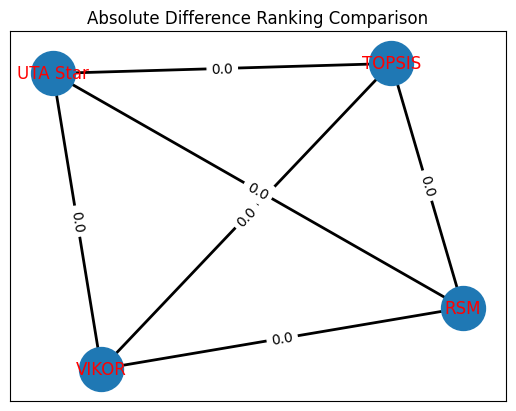

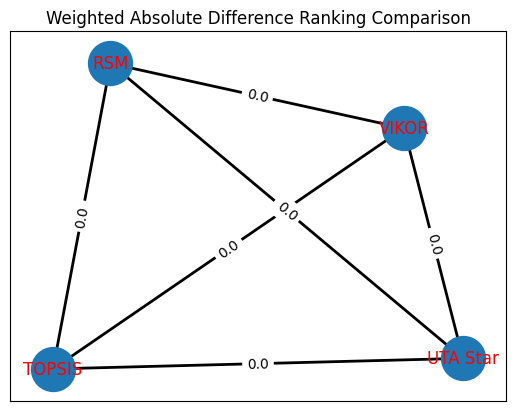

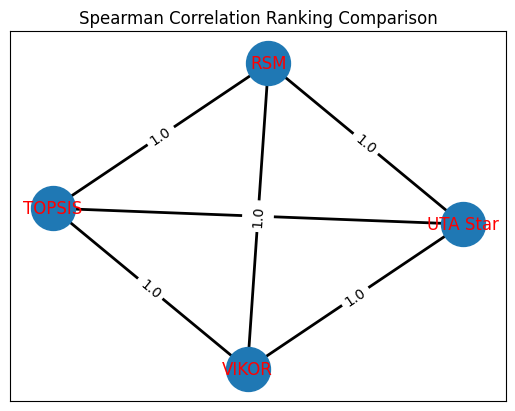

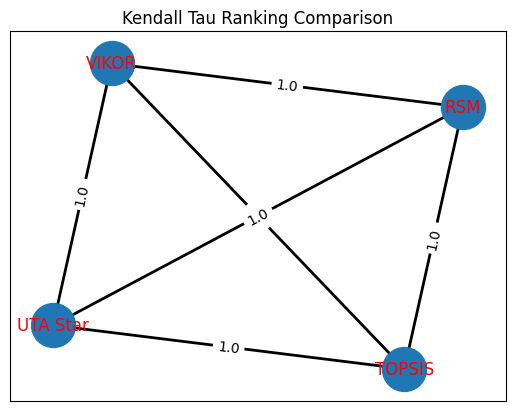

In [31]:
import numpy as np

rankings_array = np.array([value[0] for value in rankings.values()])
for cmp in COMPARISON_FUNCTIONS.keys():
    draw_comparison_graph(rankings=rankings_array, comparison_type=cmp, methods=list(rankings.keys()))

In [32]:
import numpy as np

n_alternatives = 50
n_criteria = 4

alternatives = np.random.rand(n_alternatives, n_criteria) * 100 

mean_values = np.mean(alternatives, axis=0)

ideal_points = []
anti_ideal_points = []

for i in range(n_criteria):
    ideal_point = mean_values.copy()
    anti_ideal_point = mean_values.copy()

    ideal_point[i] = np.max(alternatives[:, i])
    anti_ideal_point[i] = np.min(alternatives[:, i])

    ideal_points.append(ideal_point)
    anti_ideal_points.append(anti_ideal_point)

ideal_points = np.array(ideal_points)
anti_ideal_points = np.array(anti_ideal_points)

len(alternatives), len(ideal_points), len(anti_ideal_points) 



(50, 4, 4)

In [39]:
import pandas as pd

pd.DataFrame(alternatives).to_excel("alternatives.xlsx")

In [33]:
from app.algorithms.point import create_points_from_datapoints
from functools import partial

points = create_points_from_datapoints(alternatives)
non_dom = ideal_point_method(points)

rankings = {}
for name, method in RANKING_ALGORITHMS.items():
    if method == reference_set_method:
        method = partial(reference_set_method, ideal_points_set=ideal_points, status_quo_points_set=anti_ideal_points)
    rankings[name] = method(non_dom, weights=[0.25, 0.25, 0.25, 0.25])

In [34]:
rankings

{'TOPSIS': ([12, 13, 15, 14, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
  [0.5371531724376948,
   0.5167651735528432,
   0.49801838838118,
   0.45423080775457153,
   0.45252467794993945,
   0.4313957250853226,
   0.4274086626428085,
   0.40659846461330185,
   0.3757882582356793,
   0.33553112909187044,
   0.322234145853885,
   0.3134611296680578,
   0.29300300280480795,
   0.2703384920882147,
   0.2391840338616719,
   0.20818934596713665]),
 'RSM': ([13, 15, 12, 9, 14, 11, 7, 10, 8, 6, 4, 5, 2, 3, 0, 1],
  [0.6020794910056075,
   0.6020503868421698,
   0.6020481577017083,
   0.6020400647693462,
   0.6020273398709836,
   0.6020148281349502,
   0.6020115621486027,
   0.6020109017648332,
   0.6020106291041359,
   0.6019961757419152,
   0.6019774290468324,
   0.6019669291786883,
   0.6019629599675216,
   0.6019530628050529,
   0.6019448053678262,
   0.6019428351964881]),
 'UTA Star': ([13, 15, 12, 14, 9, 10, 11, 8, 7, 6, 5, 4, 3, 2, 1, 0],
  [0.5372596682894568,
   0.5312187658940593,
   0.497

In [46]:
for name, values in rankings.items():
    pd.DataFrame({"Nr alternatywy": values[0], "Score": values[1]}).to_excel(f"{name}.xlsx")

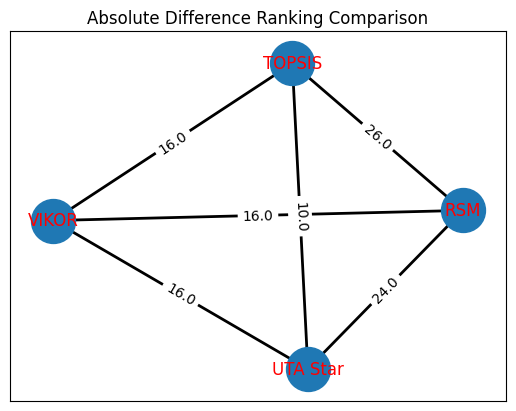

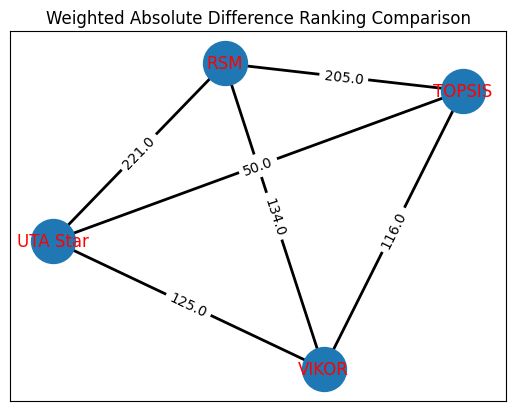

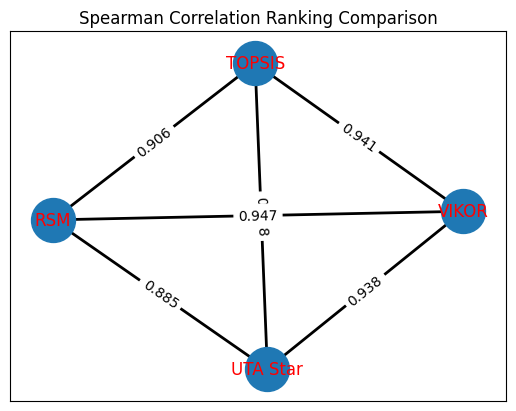

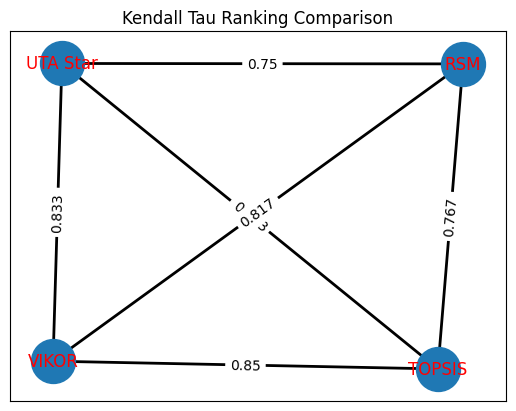

In [35]:
import numpy as np

rankings_array = np.array([value[0] for value in rankings.values()])
for cmp in COMPARISON_FUNCTIONS.keys():
    draw_comparison_graph(rankings=rankings_array, comparison_type=cmp, methods=list(rankings.keys()))